## ADS Lab 2 - Investigating Data Structures

In [1]:
import random

startno=1
endno=100
a=random.randint(startno,endno)
print(a)

49


**Exercise 1.**

In [2]:
def make_rand_list1(n):
    result=[]
    while n >0:
        result.append(random.randint(1,100))
        n-=1
    return result

In [3]:
make_rand_list1(5)

[32, 74, 26, 21, 80]

**Exercise 2.**

In [4]:
def make_rand_list1(n,startno=1,endno=100):
    result=[]
    while n >0:
        result.append(random.randint(startno,endno))
        n-=1
    return result

In [5]:
make_rand_list1(5,startno=1,endno=10)

[3, 1, 5, 2, 4]

**Exercise 3.**

In [6]:
def make_rand_list2(n,startno=1,endno=100):
    result=[]
    while n >0:
        result=[random.randint(startno,endno)]+result
        n-=1
    return result

In [7]:
def make_rand_list3(n,startno=1,endno=100):
    result=[]
    while n >0:
        result=result+[random.randint(startno,endno)]
        n-=1
    return result

In [8]:
def make_rand_list4(n,startno=1,endno=100):
    return [random.randint(startno,endno) for r in range(n)]

**Timing code**

In [9]:
import time
starttime=time.time()

x=0
for i in range(10000):
    x+=2**i

endtime=time.time() #stop the stopwatch
timetaken=endtime-starttime
print("Time taken was {}s".format(timetaken))

Time taken was 0.10577106475830078s


In [10]:

import numpy as np

def myfunc(a,b):
    x=0
    for i in range(100000):
        x+=a*i/b*(i+1) 
    
    return x

def myfunc2(numerator=10,denominator=2):
    '''
    If no values are supplied at run-time then numerator will be 10 and denominator will be 2
    '''
    
    x=0
    for i in range(100000):
        x+=numerator*i/denominator*(i+1) 
    
    return x

def timeit(somefunc,*args,repeats=100,**kwargs):
    times=[]
    for i in range(repeats):
        starttime=time.time()
        ans=somefunc(*args,**kwargs)
        endtime=time.time()
        timetaken=endtime-starttime
        times.append(timetaken)
    
    mean=np.mean(times)
    stdev=np.std(times)
 
    return (mean,stdev)

In [11]:
timeit(myfunc2,2,100,repeats=10)

(0.010493111610412598, 0.00016181882072021536)

In [12]:
timeit(make_rand_list1,100)

(0.0002107095718383789, 9.964581555660838e-05)

**Exercise 4.**

In [13]:
xs=[]
ys=[]

for i in range(0,1000,10):
    (y,z)=timeit(make_rand_list1,i,repeats=100)
    xs.append(i)
    ys.append(y)


In [14]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Average length of time to generate lists of different lengths')

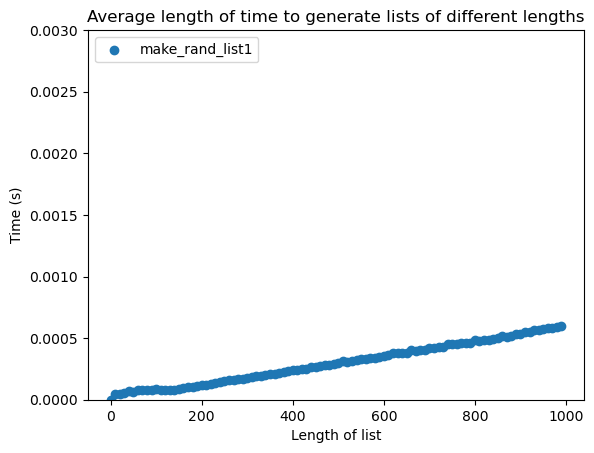

In [15]:
plt.scatter(xs,ys,label='make_rand_list1')
plt.ylim(0,0.003)  #you will need to play around with the upper limit depending on your computer
plt.legend(loc='upper left')
plt.xlabel('Length of list')
plt.ylabel('Time (s)')
plt.title('Average length of time to generate lists of different lengths')

**Exercise 5.**

In [16]:
x2s=[]
y2s=[]

for i in range(0,1000,10):
    (y,z)=timeit(make_rand_list2,i,repeats=100)
    x2s.append(i)
    y2s.append(y)


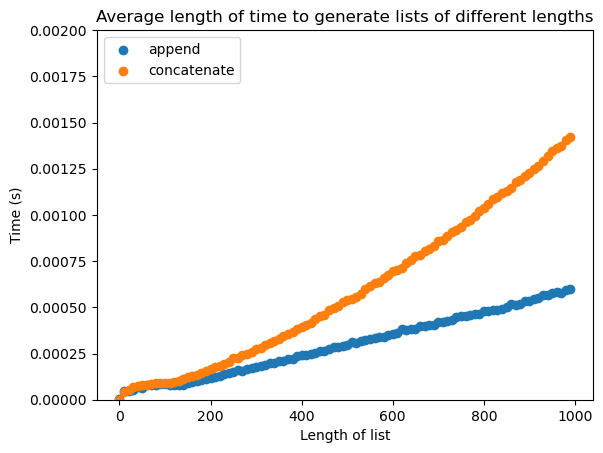

In [17]:
#fig=plt.figure()
#ax1=fig.add_subplot('111')
plt.scatter(xs,ys,label='append')
plt.scatter(xs,y2s,label='concatenate')
plt.ylim(0,0.002)
plt.legend(loc='upper left')
plt.xlabel('Length of list')
plt.ylabel('Time (s)')
plt.title('Average length of time to generate lists of different lengths')

plt.show()

In [18]:
x3s=[]
y3s=[]

for i in range(0,1000,10):
    (y,z)=timeit(make_rand_list3,i,repeats=100)
    x3s.append(i)
    y3s.append(y)
  

In [19]:
x4s=[]
y4s=[]

for i in range(0,1000,10):
    (y,z)=timeit(make_rand_list4,i,repeats=100)
    x4s.append(i)
    y4s.append(y)


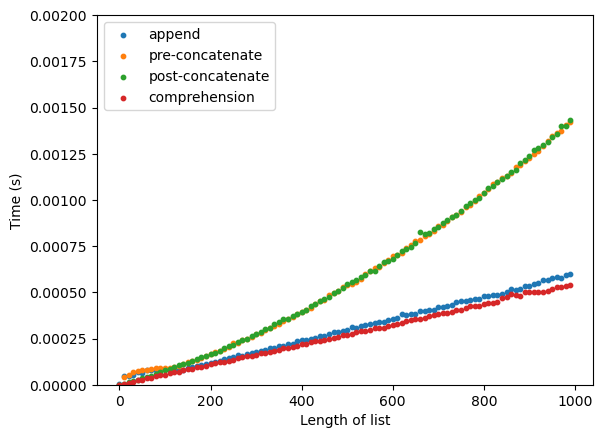

In [20]:
plt.scatter(xs,ys,label='append',s=10)
plt.scatter(xs,y2s,label='pre-concatenate',s=10)
plt.scatter(xs,y3s,label='post-concatenate',s=10)
plt.scatter(xs,y4s,label='comprehension',s=10)
plt.ylim(0,0.002)
plt.legend(loc='upper left')
plt.xlabel('Length of list')
plt.ylabel('Time (s)')
plt.show()